#### Task:
*From the dataset, we need to predict the student's Marks based on the features: the number_courses and time_study

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# 1.Importing Dataset
data = pd.read_csv("Data/Student_Marks.csv")
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


#####  Data preprocesing

In [10]:
print(data.dtypes) #To data types
data.isnull().sum() #To check null values

number_courses      int64
time_study        float64
Marks             float64
dtype: object


number_courses    0
time_study        0
Marks             0
dtype: int64

In [11]:
data.info() #complite information regarding the data set
print(' ')
data.describe() #To know data min, max and mean and pecentiles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
 


,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


##### king the distribution of the data

C:\Users\shimu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


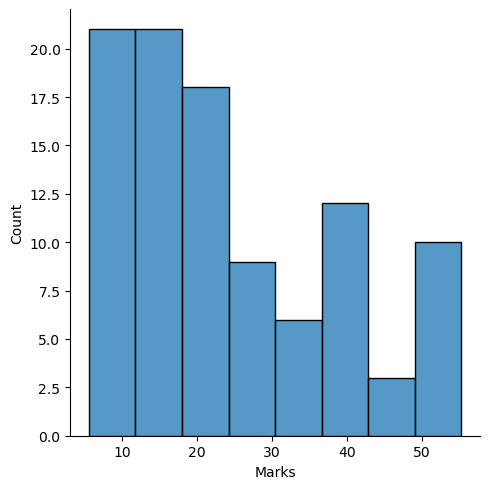

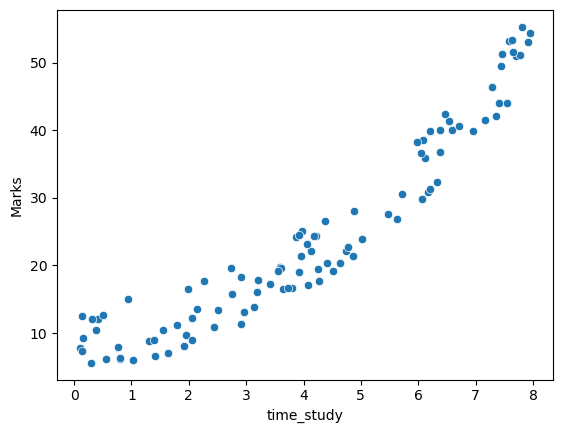

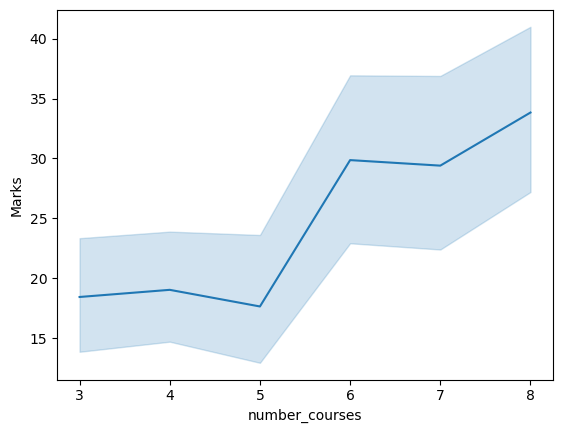

In [12]:
sns.displot(data['Marks']) #Distribution of grades
plt.show()
sns.scatterplot(x= data['time_study'], y= data['Marks'])
plt.show()
print('')
sns.lineplot(x= data['number_courses'], y= data['Marks'])
plt.show()

##### Checking corrolation

C:\Users\shimu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


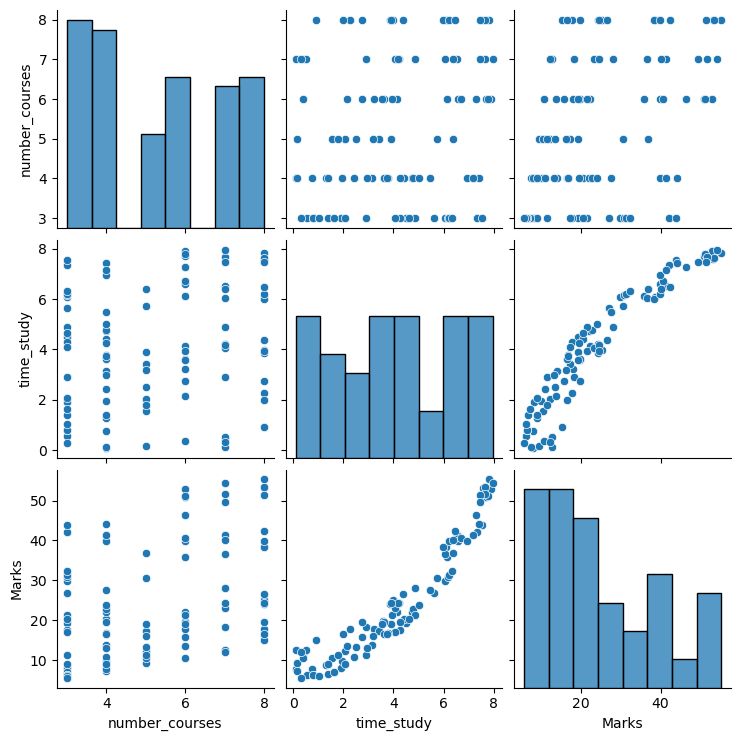

In [14]:
#There is a corrolation in between Marks and time_study

sns.pairplot(data) #To check corrolation of all features
plt.show()

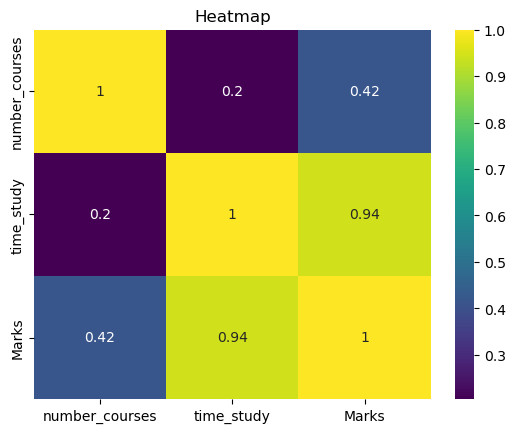

In [15]:
sns.heatmap(data.corr(),annot = True,cmap='viridis')
plt.title('Heatmap')
plt.show()

##### Scaling the data

In [16]:
#To scale data before traing the model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num = ['number_courses', 'time_study','Marks']
data[num] = scaler.fit_transform(data[num])
print(data)

    number_courses  time_study     Marks
0              0.0    0.561252  0.273556
1              0.2    0.000000  0.042765
2              0.2    0.386338  0.165063
3              0.6    0.993894  0.954095
4              1.0    0.981427  1.000000
..             ...         ...       ...
95             0.6    0.440784  0.272067
96             0.0    0.026078  0.000000
97             0.2    0.898995  0.721171
98             0.8    0.027096  0.129161
99             0.0    0.793665  0.538297

[100 rows x 3 columns]


##### Splitting the data

In [17]:
y = data.pop('Marks')
x = data

print(y)
print('')
print(x)

0     0.273556
1     0.042765
2     0.165063
3     0.954095
4     1.000000
        ...   
95    0.272067
96    0.000000
97    0.721171
98    0.129161
99    0.538297
Name: Marks, Length: 100, dtype: float64

    number_courses  time_study
0              0.0    0.561252
1              0.2    0.000000
2              0.2    0.386338
3              0.6    0.993894
4              1.0    0.981427
..             ...         ...
95             0.6    0.440784
96             0.0    0.026078
97             0.2    0.898995
98             0.8    0.027096
99             0.0    0.793665

[100 rows x 2 columns]


In [18]:
#From this splitting 80% of the data will go to the traiing and the rest 20% will go to the testing
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 30)
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

(80, 2) (20, 2) (80,) (20,)


##### Training the simple linear regresson model

In [19]:
#Importing and traing the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [20]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(x_test)
r2_score(y_test,y_pred)

0.9475182382307856

***From R-sqaure score - 0.940 - 94% variance explained.

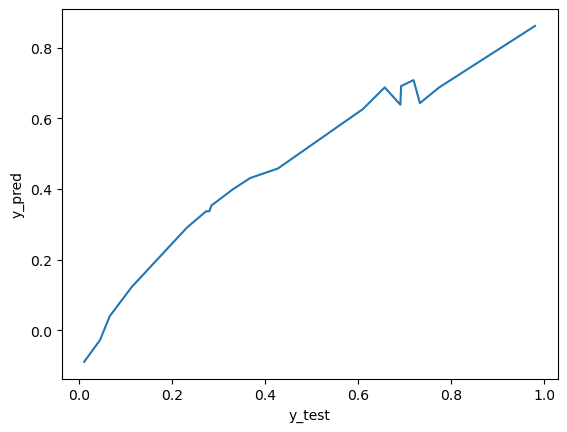

In [22]:
sns.lineplot(x= y_test, y= y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')


plt.show()

****As, we got 94% prediction score. The model is useful for future predictions and the linear regression method is a valid approach.